07. Population
## 1. 배경
- 목표
    - 1. 인구 소멸 위기 지역 파악
    - 2. 인구 소멸 위기 지역의 지도 표현
    - 3. 지도 표현에 대한 카르토그램 표현

## 2. 데이터 읽고 인구 소멸 지역 계산하기

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import set_matplotlib_hangul
import warnings

warnings.filterwarnings(action="ignore") #경고문구 무시
%matplotlib inline

---
## fillna()

In [156]:
datas = {
    "A":np.random.randint(1,45,8),
    "B":np.random.randint(1,45,8),
    "C":np.random.randint(1,45,8)
}

In [157]:
fillna_df = pd.DataFrame(datas) # random으로 데이터프레임생성
fillna_df.loc[2:4, ["A"]] = np.nan
fillna_df.loc[3:5, ["B"]] = np.nan
fillna_df.loc[4:7, ["C"]] = np.nan
fillna_df

,A,B,C
0,22.0,34.0,31.0
1,29.0,33.0,20.0
2,NaN,7.0,34.0
3,NaN,NaN,41.0
4,NaN,NaN,NaN
5,10.0,NaN,NaN
6,33.0,27.0,NaN
7,4.0,17.0,NaN


In [158]:
# 데이터 채우는 방법 : value=0 값으로 채워라, method="pad" 앞에서 쓴 값 가져와서 채워라
fillna_df.fillna(method="pad"), fillna_df.fillna(method="backfill") #backfill 뒤에서 가져와서 채워라

(      A     B     C
 0  22.0  34.0  31.0
 1  29.0  33.0  20.0
 2  29.0   7.0  34.0
 3  29.0   7.0  41.0
 4  29.0   7.0  41.0
 5  10.0   7.0  41.0
 6  33.0  27.0  41.0
 7   4.0  17.0  41.0,
       A     B     C
 0  22.0  34.0  31.0
 1  29.0  33.0  20.0
 2  10.0   7.0  34.0
 3  10.0  27.0  41.0
 4  10.0  27.0   NaN
 5  10.0  27.0   NaN
 6  33.0  27.0   NaN
 7   4.0  17.0   NaN)

---

In [159]:
population = pd.read_excel("../data/07_population_raw_data.xlsx", header=1) #1번째 행부터 읽음
population.fillna(method="pad",inplace=True) #병합때문에 NaN으로 표현된 내용을 같은 내용으로 복사함
population.head()

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,전국,소계,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,전국,소계,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,서울특별시,소계,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


In [160]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   행정구역(동읍면)별(1)  846 non-null    object 
 1   행정구역(동읍면)별(2)  846 non-null    object 
 2   항목             846 non-null    object 
 3   계              846 non-null    float64
 4   20 - 24세       846 non-null    float64
 5   25 - 29세       846 non-null    float64
 6   30 - 34세       846 non-null    int64  
 7   35 - 39세       846 non-null    float64
 8   65 - 69세       846 non-null    float64
 9   70 - 74세       846 non-null    float64
 10  75 - 79세       846 non-null    int64  
 11  80 - 84세       846 non-null    float64
 12  85 - 89세       846 non-null    float64
 13  90 - 94세       846 non-null    float64
 14  95 - 99세       846 non-null    int64  
 15  100+           846 non-null    float64
dtypes: float64(10), int64(3), object(3)
memory usage: 105.9+ KB


In [161]:
# 컬럼 이름 변경
population.rename(
    columns={
        "행정구역(동읍면)별(1)" : "광역시도",
        "행정구역(동읍면)별(2)" : "시도",
        "계" : "인구수"
    },inplace=True
)
population.tail()

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
841,제주특별자치도,제주시,남자인구수 (명),235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0
842,제주특별자치도,제주시,여자인구수 (명),234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0
843,제주특별자치도,서귀포시,총인구수 (명),170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0
844,제주특별자치도,서귀포시,남자인구수 (명),86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0
845,제주특별자치도,서귀포시,여자인구수 (명),84364.0,4905.0,3820.0,4427,5524.0,4449.0,4019.0,3845,3027.0,1485.0,630.0,213,68.0


In [162]:
population.head()

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,전국,소계,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,전국,소계,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,서울특별시,소계,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


In [163]:
# 소계 제거
population = population[population["시도"]!="소계"]
population.head()

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [164]:
population.is_copy = False # warning을 내보내지 말아라는 뜻

population.rename(
    columns={"항목" : "구분"},inplace=True
)

In [165]:
population.loc[population["구분"]=="총인구수 (명)","구분"] = "합계"
population.loc[population["구분"]=="남자인구수 (명)","구분"] = "남자"
population.loc[population["구분"]=="여자인구수 (명)","구분"] = "여자"

In [166]:
population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [167]:
# 소멸지역 조사를 위한 데이터
population["20세-39세"] = (
    population["20 - 24세"] + population["25 - 29세"] + population["30 - 34세"] + population["35 - 39세"]
)
population["65세 이상"] = (
    population["65 - 69세"] + population["70 - 74세"] + population["75 - 79세"] + population["80 - 84세"] + population["85 - 89세"] + population["90 - 94세"] + population["95 - 99세"] + population["100+"]
)

In [168]:
population.tail()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20세-39세,65세 이상
841,제주특별자치도,제주시,남자,235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0,63929.0,24084.0
842,제주특별자치도,제주시,여자,234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0,60255.0,35075.0
843,제주특별자치도,서귀포시,합계,170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0,39298.0,30030.0
844,제주특별자치도,서귀포시,남자,86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0,20622.0,12294.0
845,제주특별자치도,서귀포시,여자,84364.0,4905.0,3820.0,4427,5524.0,4449.0,4019.0,3845,3027.0,1485.0,630.0,213,68.0,18676.0,17736.0


In [169]:
# pivot_table
pop = pd.pivot_table(
    data = population,
    index = ["광역시도","시도"],
    columns=["구분"],values=["인구수","20세-39세","65세 이상"] # 두데이터는 지정하지 않으면 default는 평균값이 들어감
)

In [170]:
pop

20세-39세                       65세 이상                         인구수  \
구분              남자        여자        합계       남자       여자       합계        남자   
광역시도 시도                                                                       
강원도  강릉시   26286.0   23098.0   49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군    4494.0    2529.0    7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시   11511.0    9753.0   21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시    8708.0    7115.0   15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시    9956.0    8752.0   18708.0   5139.0   7613.0  12752.0   40288.0   
...            ...       ...       ...      ...      ...      ...       ...   
충청북도 진천군    9391.0    7622.0   17013.0   4731.0   6575.0  11306.0   36387.0   
     청원구   32216.0   27805.0   60021.0   8417.0  11914.0  20331.0   97006.0   
     청주시  128318.0  115719.0  244037.0  37882.0  53671.0  91553.0  419323.0   
     충주시   26600.0   22757.0   49357.0  14407.0  20383.0  34790.0  104877.0   
     흥덕구   40933.0   37675.0   78608.0   9788.0  13671.0  23459.0  127647.0   

                              
구분              여자        합계  
광역시도 시도                       
강원도  강릉시  107615.0  213846.0  
     고성군   14215.0   30114.0  
     동해시   46131.0   93297.0  
     삼척시   34346.0   69599.0  
     속초시   41505.0   81793.0  
...            ...       ...  
충청북도 진천군   33563.0   69950.0  
     청원구   93807.0  190813.0  
     청주시  415874.0  835197.0  
     충주시  103473.0  208350.0  
     흥덕구  125916.0  253563.0  

[264 rows x 9 columns]

In [171]:
#소멸 비율 계산
pop["소멸비율"] = pop["20세-39세","여자"] / (pop["65세 이상", "합계"] / 2)
pop.tail()

20세-39세                       65세 이상                         인구수  \
구분              남자        여자        합계       남자       여자       합계        남자   
광역시도 시도                                                                       
충청북도 진천군    9391.0    7622.0   17013.0   4731.0   6575.0  11306.0   36387.0   
     청원구   32216.0   27805.0   60021.0   8417.0  11914.0  20331.0   97006.0   
     청주시  128318.0  115719.0  244037.0  37882.0  53671.0  91553.0  419323.0   
     충주시   26600.0   22757.0   49357.0  14407.0  20383.0  34790.0  104877.0   
     흥덕구   40933.0   37675.0   78608.0   9788.0  13671.0  23459.0  127647.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시도                                 
충청북도 진천군   33563.0   69950.0  1.348311  
     청원구   93807.0  190813.0  2.735232  
     청주시  415874.0  835197.0  2.527913  
     충주시  103473.0  208350.0  1.308249  
     흥덕구  125916.0  253563.0  3.211987

In [172]:
# 소멸위기지역 컬럼 생성
pop["소멸위기지역"] = pop["소멸비율"] < 1.0 #T/F
pop

20세-39세                       65세 이상                         인구수  \
구분              남자        여자        합계       남자       여자       합계        남자   
광역시도 시도                                                                       
강원도  강릉시   26286.0   23098.0   49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군    4494.0    2529.0    7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시   11511.0    9753.0   21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시    8708.0    7115.0   15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시    9956.0    8752.0   18708.0   5139.0   7613.0  12752.0   40288.0   
...            ...       ...       ...      ...      ...      ...       ...   
충청북도 진천군    9391.0    7622.0   17013.0   4731.0   6575.0  11306.0   36387.0   
     청원구   32216.0   27805.0   60021.0   8417.0  11914.0  20331.0   97006.0   
     청주시  128318.0  115719.0  244037.0  37882.0  53671.0  91553.0  419323.0   
     충주시   26600.0   22757.0   49357.0  14407.0  20383.0  34790.0  104877.0   
     흥덕구   40933.0   37675.0   78608.0   9788.0  13671.0  23459.0  127647.0   

                                  소멸비율 소멸위기지역  
구분              여자        합계                   
광역시도 시도                                        
강원도  강릉시  107615.0  213846.0  1.226041  False  
     고성군   14215.0   30114.0  0.707314   True  
     동해시   46131.0   93297.0  1.289738  False  
     삼척시   34346.0   69599.0  0.973990   True  
     속초시   41505.0   81793.0  1.372647  False  
...            ...       ...       ...    ...  
충청북도 진천군   33563.0   69950.0  1.348311  False  
     청원구   93807.0  190813.0  2.735232  False  
     청주시  415874.0  835197.0  2.527913  False  
     충주시  103473.0  208350.0  1.308249  False  
     흥덕구  125916.0  253563.0  3.211987  False  

[264 rows x 11 columns]

----
## 111. 인구현황데이터에 지도 ID 만들기

In [173]:
# 소멸위기지역 조회
# pop[pop["소멸위기지역"] == True]
pop[pop["소멸위기지역"] == True].index.get_level_values(1) #위 DataFrame에서 두번째 index 리스트 가져오기


Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

In [174]:
pop.reset_index(inplace=True,drop=True)
pop.head()

20세-39세                     65세 이상                         인구수            \
구분       남자       여자       합계       남자       여자       합계        남자        여자   
0   26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0  107615.0   
1    4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   14215.0   
2   11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   46131.0   
3    8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   34346.0   
4    9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   41505.0   

                  소멸비율 소멸위기지역  
구분        합계                   
0   213846.0  1.226041  False  
1    30114.0  0.707314   True  
2    93297.0  1.289738  False  
3    69599.0  0.973990   True  
4    81793.0  1.372647  False

In [175]:
tmp_columns = [ 
    pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n] 
    for n in range(0,len(pop.columns.get_level_values(0))) 
    ]
pop.columns = tmp_columns

In [176]:
pop.head()

,20세-39세남자,20세-39세여자,20세-39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


## 3. 지도 시각화를 위한 지역별 ID 만들기 

In [177]:
# 시도만 선택해서 unique값
pop["시도"].unique()

KeyError: '시도'

In [ ]:
si_name = [None] * len(pop) # 264개

In [ ]:
tmp_gu_dict = { #시별 행정구 정리
    "수원" : ["장안구","권선구","팔달구","영통구"],
    "성남" : ["수정구","중원구","분당구"],
    "안양" : ["만안구","동안구"],
    "안산" : ["상록구", "단원구"],
    "고양" : ["덕양구","일산동구","일산서구"],
    "용인" : ["처인구","기흥구","수지구"],
    "청주" : ["상당구","서원구","흥덕구","청원구"],
    "천안" : ["동남구","서북구"],
    "전주" : ["완산구","덕진구"],
    "포항" : ["남구","북구"],
    "창원" : ["의창구","성산구","진해구","마산합포구","마산회원구"],
    "부천" : ["오정구", "원미구","소사구"]
}

In [ ]:
pop.head()

,광역시도,시도,20세-39세남자,20세-39세여자,20세-39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


In [ ]:
# pop["광역시도"].unique(), pop["시도"].unique() ## 두개 합칠거임

#### (1) 일반 시 이름과 세종시, 광역시도 일반 구 정리


In [ ]:
for idx,row in pop.iterrows():
    if row["광역시도"][-3:] not in ["광역시","특별시","자치시"]:
        si_name[idx] = row["시도"][:-1] #시 빼고 저장
    elif row["광역시도"] == "세종특별자치시":
        si_name[idx] = "세종" # 또는 row[":3]
    else:
        if len(row["시도"])==2:
            si_name[idx] = row["광역시도"][:2] + " " + row["시도"]#
        else :
            si_name[idx] = row["광역시도"][:2] + " " + row["시도"][:-1] #포항 북구

In [ ]:
si_name[:5]

['강릉', '고성', '동해', '삼척', '속초']

#### (2) 행정구

In [ ]:
for idx, row in pop.iterrows():
    if row["광역시도"][-3:] not in ["광역시","특별시","자치시"]:
        for keys,values in tmp_gu_dict.items():
            if row["시도"] in values: #행정구라는 뜻
                if len(row["시도"]) == 2:
                    si_name[idx] = keys + " " + row["시도"]
                elif row["시도"] in ["마산합포구","마산회원구"]:
                    si_name[idx] = keys +" "+ row["시도"][2:-1] #합포,회원만 사용
                else :
                    si_name[idx] = keys+" "+row["시도"][:-1]


#### (3)고성군

In [ ]:
for idx, row in pop.iterrows():
    if row["광역시도"][-3:] not in ["광역시","특별시","자치시"]:
        if row["시도"][:-1] == "고성" and row["광역시도"] == "강원도" : ##강원도에 잇는 고성
            si_name[idx] = "고성(강원)"
        elif row["시도"][:-1] == "고성" and row["광역시도"] == "경상남도" : #경상남도에 있는 고성
            si_name[idx] = "고성(경남)"

In [ ]:
si_name[-5:] #완성

['진천', '청주 청원', '청주', '충주', '청주 흥덕']

In [ ]:
pop["ID"] = si_name

In [ ]:
pop

,광역시도,시도,20세-39세남자,20세-39세여자,20세-39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,충청북도,진천군,9391.0,7622.0,17013.0,4731.0,6575.0,11306.0,36387.0,33563.0,69950.0,1.348311,False,진천
260,충청북도,청원구,32216.0,27805.0,60021.0,8417.0,11914.0,20331.0,97006.0,93807.0,190813.0,2.735232,False,청주 청원
261,충청북도,청주시,128318.0,115719.0,244037.0,37882.0,53671.0,91553.0,419323.0,415874.0,835197.0,2.527913,False,청주
262,충청북도,충주시,26600.0,22757.0,49357.0,14407.0,20383.0,34790.0,104877.0,103473.0,208350.0,1.308249,False,충주


In [ ]:
del pop["20세-39세남자"]
del pop["65세 이상남자"]
del pop["65세 이상여자"]

---
---

## 카르토그램으로 인구현황 시각화하기

In [ ]:
draw_korea_raw = pd.read_excel("../data/07_draw_korea_raw.xlsx")
draw_korea_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN


In [ ]:
draw_korea_raw.stack() #스택형태로 보여주기
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked

0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[252 rows x 1 columns]

In [ ]:
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [ ]:
draw_korea_raw_stacked.rename(
    columns={
        "level_0": "y",
        "level_1": "x",
        0:"ID"
    },inplace=True
)

In [ ]:
draw_korea = draw_korea_raw_stacked
draw_korea

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [ ]:
BORDER_LINES = [
    [(5, 1), (5, 2), (7, 2), (7, 3), (11, 3), (11, 0)], # 인천
    [(5, 4), (5, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9), (7, 7), (9, 7), (9, 5), (10, 5), (10, 4), (5, 4)], # 서울
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7), (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), (11, 4), (11, 3)], # 경기도
    [(8, 10), (8, 11), (6, 11), (6, 12)], # 강원도
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5), (15, 4), (16, 4), (16, 2)], # 충청북도
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), (19, 5), (20, 5), (20, 4), (21, 4), (21, 3), (19, 3), (19, 1)], # 전라북도
    [(13, 5), (13, 6), (16, 6)], 
    [(13, 5), (14, 5)], # 대전시 # 세종시
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4), (24, 2), (21, 2)], # 광주
    [(20, 5), (21, 5), (21, 6), (23, 6)], # 전라남도
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)], # 충청북도
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)], # 경상북도
    [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)], # 대구
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)], # 부산
    [(16, 11), (16, 13)],
    [(27, 5), (27, 6), (25, 6)]
]


In [ ]:
def plot_text_test(draw_korea):
    for idx, row in draw_korea.iterrows():
        if len(row["ID"].split())==2: # 고양 일산동
            dispname = "{}\n{}".format(row["ID"].split()[0], row["ID"].split()[1])
        elif row["ID"][:2] == "고성":
            dispname = "고성"
        else :
            dispname = row["ID"]

        if len(dispname.splitlines()[-1]) >= 3: #글자 3글자 이상이면 글자사이즈 수정
            fontsize, linespacing = 9.5,1.5
        else :
            fontsize, linespacing = 11, 1.2 

        plt.annotate( #주석
            dispname,
            (row["x"]+0.5,row["y"]+0.5),
            weight="bold",
            fontsize=fontsize,
            linespacing=linespacing,
            ha = "center", #수평정렬
            va="center" #수직 정렬
        )


In [ ]:
def testDraw(draw_korea):
    plt.figure(figsize=(8,11))

    plot_text_test(draw_korea)

    for path in BORDER_LINES:
        ys, xs = zip(*path)
        #print(ys,xs)
        plt.plot(xs,ys,color="black",lw=1.5)
    plt.gca().invert_yaxis() #y축뒤집기?
    plt.axis("off") #
    plt.tight_layout() # 글씨가 여유로워지는형태
    plt.show()

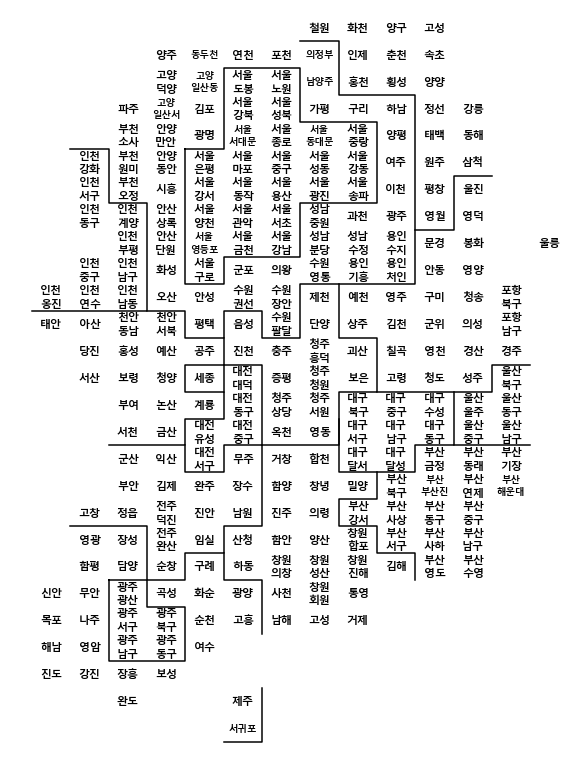

In [ ]:
testDraw(draw_korea)

---

In [ ]:
draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


#### 검증 작업

In [ ]:
set(draw_korea["ID"].unique()) - set(pop["ID"].unique())

set()

In [ ]:
set(pop["ID"].unique()) - set(draw_korea["ID"].unique()) 

{'고양', '부천', '성남', '수원', '안산', '안양', '용인', '전주', '창원', '천안', '청주', '포항'}

In [ ]:
tmp_list = list(set(pop["ID"].unique()) - set(draw_korea["ID"].unique()) )

for tmp in tmp_list:
    pop = pop.drop(pop[pop["ID"] == tmp].index)

print(set(pop["ID"].unique()) - set(draw_korea["ID"].unique()))

set()


### merge

In [ ]:
pop = pd.merge(pop, draw_korea, how="left", on="ID") #ID를 기준으로 두 DATAFRAME 합치면 y,x 추가된 것을 확인가능
pop.head()

,광역시도,시도,20세-39세여자,20세-39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y_x,x_x,y_y,x_y
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10,0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10,1,10


---

#### 그림을 그리기 위한 데이터를 계산하는 함수
- 색상을 만들 때, 최소값을 흰색
- blockedMap : 인구현황(pop)
- targetData : 그리고 싶은 컬럼

In [ ]:
def get_data_info(targetData, blockedMap): #뭐하는건지 파악필요
    whitelabelmin = (
        max(blockedMap[targetData])) - min(blockedMap[targetData])* 0.25 + min(blockedMap[targetData])
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index="y", columns="x", values=targetData)
    return mapdata, vmax, vmin, whitelabelmin

In [ ]:
def get_data_info_for_zero_center(targetData, blockedMap):
    whitelabelmin = 5
    tmp_max = max(
        np.abs(min(blockedMap[targetData])), np.abs(max(blockedMap[targetData]))
    )
    vmin, vmax = tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index="y", columns="x", values=targetData)
    return mapdata, vmax, vmin, whitelabelmin

In [ ]:
def plot_text(targetData, blockedMap, whitelabelmin):
    for idx, row in blockedMap.iterrows():
        if len(row["ID"].split())==2: # 고양 일산동
            dispname = "{}\n{}".format(row["ID"].split()[0], row["ID"].split()[1])
        elif row["ID"][:2] == "고성":
            dispname = "고성"
        else :
            dispname = row["ID"]

        if len(dispname.splitlines()[-1]) >= 3: #글자 3글자 이상이면 글자사이즈 수정
            fontsize, linespacing = 9.5,1.5
        else :
            fontsize, linespacing = 11, 1.2 
        ###추가내용
        annocolor = "white" if np.abs(row[targetData]) > whitelabelmin else "black"

        ###

        plt.annotate( #주석
            dispname,
            (row["x"]+0.5,row["y"]+0.5),
            weight="bold",
            color = annocolor, ##추가내용적용
            fontsize=fontsize,
            linespacing=linespacing,
            ha = "center", #수평정렬
            va="center" #수직 정렬

        )

In [ ]:
def drawKorea(targetData,blockedMap, cmapname, zeroCenter=False):
    ###추가내용
    if zeroCenter:
        masked_mapdata, vmax, vmin, whitelabelmin = get_data_info_for_zero_center(targetData, blockedMap)
    if not zeroCenter:
        masked_mapdata, vmax, vmin, whitelabelmin = get_data_info(targetData, blockedMap)
    ###

    plt.figure(figsize=(8,11))
    
    ###
    plt.pcolot(masked_mapdata,vmin=vmin,vmax=vmax, cmap=cmapname, edgecolor="#aaaaaa", linewidth=0.5)
    plot_text_test(targetData,blockedMap, whitelabelmin)
    ###

    for path in BORDER_LINES:
        ys, xs = zip(*path)
        #print(ys,xs)
        plt.plot(xs,ys,color="black",lw=1.5)
    plt.gca().invert_yaxis() #y축뒤집기?
    plt.axis("off") #
    plt.tight_layout() # 글씨가 여유로워지는형태
    ###
    cb = plt.colorbar(shrink=0.1, aspect=10) #받은컬럼을 기준으로 colorbar를 그려줘라
    cb.set_label(targetData)
    ###
    plt.show()

In [ ]:
pop.head()

,광역시도,시도,20세-39세여자,20세-39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y_x,x_x,y_y,x_y
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10,0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10,1,10


In [ ]:
# drawKorea(targetData,blockedMap, cmapname, zeroCenter=False):
drawKorea("인구수합계",pop, "Blues")

KeyError: 'y'